<a href="https://colab.research.google.com/github/MariuszJarosz86/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np

import os, datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
len(np.unique(y_train))

43

In [5]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
y_train[0]

41

In [7]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [8]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [9]:
y_train.ndim

1

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [11]:
y_train.shape

(34799, 43)

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [14]:
model = Sequential([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),

   Flatten(),

   Dense(units = num_classes, activation='softmax'),                
])

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 16.1589 - accuracy: 0.7945


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),

    Flatten(),

    Dense(units = num_classes, activation='softmax'),                
  ])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs',5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data',(X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model

In [18]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 29.2370 - accuracy: 0.7587 - val_loss: 0.2425 - val_accuracy: 0.9424
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1972 - accuracy: 0.9530 - val_loss: 0.1870 - val_accuracy: 0.9602
Epoch 3/5
272/272 [==============================] - 4s 17ms/step - loss: 0.1324 - accuracy: 0.9686 - val_loss: 0.0923 - val_accuracy: 0.9785
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0959 - accuracy: 0.9769 - val_loss: 0.0728 - val_accuracy: 0.9851
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0913 - accuracy: 0.9797 - val_loss: 0.1418 - val_accuracy: 0.9704


In [19]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.8459166e-11, 1.4516522e-04, 2.0779930e-03, ..., 4.4910828e-04,
        5.9449367e-02, 4.6659339e-02],
       [2.0947636e-11, 5.4449509e-05, 2.8903410e-02, ..., 9.2022028e-04,
        1.1641724e-04, 1.7439279e-03],
       [4.2505534e-11, 3.6438220e-04, 6.9450698e-04, ..., 2.4266414e-04,
        9.0386625e-03, 5.3149093e-02],
       ...,
       [1.9453196e-02, 1.6425507e-02, 1.2499058e-02, ..., 2.0971298e-02,
        2.4127712e-02, 2.3263015e-02],
       [1.8523885e-02, 2.3210084e-02, 1.1914507e-02, ..., 1.5551089e-02,
        3.6730982e-02, 2.2139557e-02],
       [1.4286675e-02, 2.3253115e-02, 9.9708121e-03, ..., 1.9407034e-02,
        2.4416156e-02, 1.3732502e-02]], dtype=float32)

In [25]:
y_pred_prob[400]

array([9.4528594e-05, 6.9944630e-04, 9.9920601e-01, 4.2866910e-09,
       2.7592691e-08, 2.8470960e-12, 8.1224277e-10, 3.6735567e-18,
       1.2020740e-12, 6.3455585e-10, 5.9640252e-17, 2.9924915e-23,
       5.4939372e-18, 2.2033613e-09, 1.6458631e-12, 1.9188306e-10,
       5.5595394e-13, 5.9417177e-27, 2.2726773e-18, 8.9939271e-26,
       6.2373418e-15, 6.1165710e-19, 6.7916988e-24, 1.5996949e-16,
       1.0116578e-18, 1.8541270e-18, 1.4927463e-17, 2.5164256e-22,
       1.8224161e-12, 1.6798595e-15, 3.5007533e-23, 9.9263346e-16,
       2.7134205e-15, 9.2907904e-12, 1.1156564e-11, 1.5562046e-12,
       8.3707789e-12, 8.0203107e-22, 1.2838885e-13, 3.2713713e-17,
       1.8554802e-16, 8.0351266e-16, 5.5769857e-18], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [30]:
labels_dict[ np.argmax(y_pred_prob[400]) ]

'Speed limit (50km/h)'

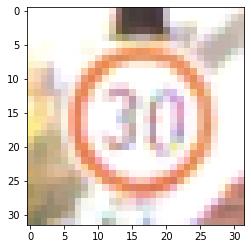

In [26]:
plt.imshow(X_test[400]);

<BarContainer object of 43 artists>

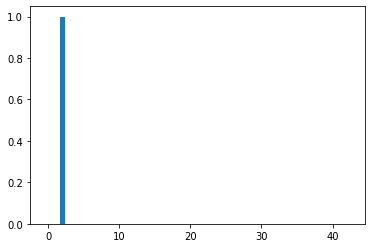

In [31]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
# Jeszcze raz po sprawdzeniu

def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [44]:
predict(model_trained, X_test, y_test)

0.7875283446712018

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [48]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 7.9948 - accuracy: 0.1863 - val_loss: 2.4587 - val_accuracy: 0.3650
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 2.0600 - accuracy: 0.4040 - val_loss: 1.2102 - val_accuracy: 0.6570
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 1.3298 - accuracy: 0.5948 - val_loss: 0.7118 - val_accuracy: 0.8219
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.8697 - accuracy: 0.7325 - val_loss: 0.3423 - val_accuracy: 0.9202
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5676 - accuracy: 0.8284 - val_loss: 0.1918 - val_accuracy: 0.9608


0.8562358276643991

In [49]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 1.9302 - accuracy: 0.5825 - val_loss: 0.2624 - val_accuracy: 0.9508
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.3676 - accuracy: 0.8920 - val_loss: 0.0738 - val_accuracy: 0.9822
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2197 - accuracy: 0.9361 - val_loss: 0.0434 - val_accuracy: 0.9896
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1444 - accuracy: 0.9594 - val_loss: 0.0246 - val_accuracy: 0.9953
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1074 - accuracy: 0.9685 - val_loss: 0.0153 - val_accuracy: 0.9958


0.9718820861678005

In [57]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


get_cnn_v4(input_shape, num_classes).summary()
# train_and_predict(get_cnn_v4(input_shape, num_classes))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)        

In [58]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 2.8203 - accuracy: 0.2660 - val_loss: 1.2033 - val_accuracy: 0.6279
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.9679 - accuracy: 0.6979 - val_loss: 0.2272 - val_accuracy: 0.9357
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.3893 - accuracy: 0.8817 - val_loss: 0.0934 - val_accuracy: 0.9765
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2403 - accuracy: 0.9276 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1861 - accuracy: 0.9443 - val_loss: 0.0391 - val_accuracy: 0.9893


0.9591836734693877

In [94]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v5((32,32,1), num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.4806 - accuracy: 0.3201 - val_loss: 0.8324 - val_accuracy: 0.7419
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.7573 - accuracy: 0.7596 - val_loss: 0.2022 - val_accuracy: 0.9428
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3514 - accuracy: 0.8904 - val_loss: 0.0841 - val_accuracy: 0.9757
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2296 - accuracy: 0.9305 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1802 - accuracy: 0.9481 - val_loss: 0.0414 - val_accuracy: 0.9889


0.9630385487528345

In [60]:
X_train[0].shape

(32, 32, 3)

In [61]:
color.rgb2gray(X_train[0]).shape

(32, 32)

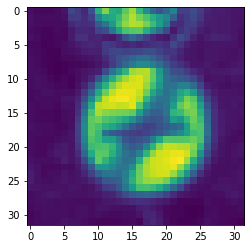

In [63]:
plt.imshow(color.rgb2gray(X_train[0]))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [71]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5309 - accuracy: 0.2873 - val_loss: 0.6023 - val_accuracy: 0.8209
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4930 - accuracy: 0.8457 - val_loss: 0.1123 - val_accuracy: 0.9640
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2241 - accuracy: 0.9290 - val_loss: 0.0593 - val_accuracy: 0.9822
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1510 - accuracy: 0.9537 - val_loss: 0.0350 - val_accuracy: 0.9899
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1129 - accuracy: 0.9647 - val_loss: 0.0259 - val_accuracy: 0.9925


0.9580498866213152

In [89]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.4),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v6((32,32,1), num_classes).summary()
model = get_cnn_v6((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 11s 42ms/step - loss: 1.9945 - accuracy: 0.4223 - val_loss: 0.3643 - val_accuracy: 0.8852
Epoch 2/5
272/272 [==============================] - 11s 41ms/step - loss: 0.3175 - accuracy: 0.8967 - val_loss: 0.1136 - val_accuracy: 0.9642
Epoch 3/5
272/272 [==============================] - 11s 41ms/step - loss: 0.1411 - accuracy: 0.9556 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 4/5
272/272 [==============================] - 11s 41ms/step - loss: 0.0916 - accuracy: 0.9714 - val_loss: 0.0267 - val_accuracy: 0.9918
Epoch 5/5
272/272 [==============================] - 11s 41ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0251 - val_accuracy: 0.9925


0.9718820861678005

In [100]:
def get_cnn_v7(input_shape, num_classes):
    return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.4),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v7((32,32,1), num_classes).summary()
model = get_cnn_v7((32,32,1), num_classes)
params_fit = {
    'epochs': 10
}
model_trained = train_model(model, X_train_gray, y_train, params_fit)
predict(model_trained, X_test_gray, y_test)

Epoch 1/10
272/272 [==============================] - 11s 42ms/step - loss: 2.6799 - accuracy: 0.2456 - val_loss: 0.6766 - val_accuracy: 0.7784
Epoch 2/10
272/272 [==============================] - 11s 41ms/step - loss: 0.4707 - accuracy: 0.8460 - val_loss: 0.1208 - val_accuracy: 0.9632
Epoch 3/10
272/272 [==============================] - 11s 41ms/step - loss: 0.1715 - accuracy: 0.9465 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 4/10
272/272 [==============================] - 11s 41ms/step - loss: 0.1096 - accuracy: 0.9655 - val_loss: 0.0229 - val_accuracy: 0.9934
Epoch 5/10
272/272 [==============================] - 11s 41ms/step - loss: 0.0810 - accuracy: 0.9740 - val_loss: 0.0153 - val_accuracy: 0.9956
Epoch 6/10
272/272 [==============================] - 11s 41ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0154 - val_accuracy: 0.9958
Epoch 7/10
272/272 [==============================] - 11s 41ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0090 - val_accuracy:

0.982766439909297

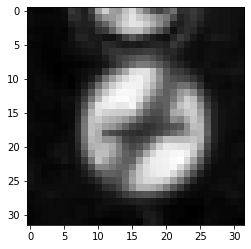

In [73]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));